<a href="https://colab.research.google.com/github/nilaypatel99/Capstone_project/blob/main/unet_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob

In [ ]:
image_directory = '/content/drive/MyDrive/unet_images/new/image_resize'
mask_directory = '/content/drive/MyDrive/unet_images/new/mask_resize'

In [ ]:
# SIZE = 224
num_images = 100

In [ ]:
image_names = glob.glob("/content/drive/MyDrive/unet_images/new/image_resize/*.png")
print(image_names)

['/content/drive/MyDrive/unet_images/new/image_resize/IR_0875.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_4968.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0860.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_2904.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_7455.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_5557.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_3416.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0861.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_7446.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_3748.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0990.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_3630.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_5614.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_1026.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_5317.

In [ ]:
image_names.sort()
print(image_names)

['/content/drive/MyDrive/unet_images/new/image_resize/IR_0141.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0414.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0706.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0729.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0737.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0756.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0768.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0819.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0860.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0861.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0875.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0899.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0965.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0990.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_1016.

In [ ]:
image_names_subset = image_names[0:num_images]

In [ ]:
print(image_names_subset)

['/content/drive/MyDrive/unet_images/new/image_resize/IR_0141.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0414.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0706.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0729.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0737.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0756.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0768.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0819.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0860.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0861.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0875.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0899.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0965.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_0990.png', '/content/drive/MyDrive/unet_images/new/image_resize/IR_1016.

In [ ]:
images = [cv2.imread(img, 0) for img in image_names_subset]

In [ ]:
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)

In [ ]:
# mask images
mask_names = glob.glob("/content/drive/MyDrive/unet_images/new/mask_resize/*.png")
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)


In [ ]:
print(mask_names_subset)

['/content/drive/MyDrive/unet_images/new/mask_resize/IR_0141-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0414-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0706-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0729-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0737-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0756-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0768-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0819-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0860-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0861-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0875-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0899-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0965-BIN.png', '/content/drive/MyDrive/unet_images/new/mask_resize/IR_0990-BIN.png', '/content/drive/MyD

In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (100, 224, 224, 1)
Mask data shape is:  (100, 224, 224, 1)
Max pixel value in image is:  255
Labels in the mask are :  [  0 255]


In [ ]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [ ]:
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Max pixel value in image is:  1.0
Labels in the mask are :  [0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)


In [ ]:

import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
# Extract the filename from the path
filename = os.path.basename(image_names_subset[image_number])
plt.title(filename)

plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
# Extract the filename from the path
filename1 = os.path.basename(mask_names_subset[image_number])
plt.title(filename1)
plt.show()

In [ ]:

# # Building Unet by dividing encoder and decoder into blocks

# from keras.models import Model
# from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
# from keras.optimizers import Adam
# from keras.layers import Activation, MaxPool2D, Concatenate


# def conv_block(input, num_filters):
#     x = Conv2D(num_filters, 3, padding="same")(input)
#     x = BatchNormalization()(x)   #Not in the original network.
#     x = Activation("relu")(x)

#     x = Conv2D(num_filters, 3, padding="same")(x)
#     x = BatchNormalization()(x)  #Not in the original network
#     x = Activation("relu")(x)

#     return x

# #Encoder block: Conv block followed by maxpooling


# def encoder_block(input, num_filters):
#     x = conv_block(input, num_filters)
#     p = MaxPool2D((2, 2))(x)
#     return x, p

# #Decoder block
# #skip features gets input from encoder for concatenation

# def decoder_block(input, skip_features, num_filters):
#     x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
#     x = Concatenate()([x, skip_features])
#     x = conv_block(x, num_filters)
#     return x

# #Build Unet using the blocks
# def build_unet(input_shape, n_classes):
#     inputs = Input(input_shape)

#     s1, p1 = encoder_block(inputs, 64)
#     s2, p2 = encoder_block(p1, 128)
#     s3, p3 = encoder_block(p2, 256)
#     s4, p4 = encoder_block(p3, 512)

#     b1 = conv_block(p4, 1024) #Bridge

#     d1 = decoder_block(b1, s4, 512)
#     d2 = decoder_block(d1, s3, 256)
#     d3 = decoder_block(d2, s2, 128)
#     d4 = decoder_block(d3, s1, 64)

#     if n_classes == 1:  #Binary
#       activation = 'sigmoid'
#     else:
#       activation = 'softmax'

#     outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
#     print(activation)

#     model = Model(inputs, outputs, name="U-Net")
#     return model

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

################################################################
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # model.summary()

    return model

In [ ]:

IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

# input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)


In [ ]:
model = simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 224, 224, 16)         160       ['input_2[0][0]']             
                                                                                                  
 dropout_9 (Dropout)         (None, 224, 224, 16)         0         ['conv2d_19[0][0]']           
                                                                                                  
 conv2d_20 (Conv2D)          (None, 224, 224, 16)         2320      ['dropout_9[0][0]']           
                                                                                            

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=10,
                    verbose=1,
                    epochs=40,
                    validation_data=(X_test, y_test),
                    shuffle=False)


Epoch 1/40
8/8 [==============================] - 16s 165ms/step - loss: 0.7255 - accuracy: 0.4927 - val_loss: 0.6744 - val_accuracy: 0.4698
Epoch 2/40
8/8 [==============================] - 1s 101ms/step - loss: 0.6717 - accuracy: 0.4973 - val_loss: 0.6598 - val_accuracy: 0.5455
Epoch 3/40
8/8 [==============================] - 1s 103ms/step - loss: 0.6411 - accuracy: 0.6249 - val_loss: 0.6800 - val_accuracy: 0.6713
Epoch 4/40
8/8 [==============================] - 1s 107ms/step - loss: 0.6654 - accuracy: 0.6769 - val_loss: 0.6047 - val_accuracy: 0.7556
Epoch 5/40
8/8 [==============================] - 1s 105ms/step - loss: 0.5555 - accuracy: 0.7672 - val_loss: 0.4954 - val_accuracy: 0.7749
Epoch 6/40
8/8 [==============================] - 1s 101ms/step - loss: 0.4433 - accuracy: 0.8153 - val_loss: 0.4735 - val_accuracy: 0.7834
Epoch 7/40
8/8 [==============================] - 1s 105ms/step - loss: 0.4145 - accuracy: 0.8540 - val_loss: 0.4811 - val_accuracy: 0.7963
Epoch 8/40
8/8 [===

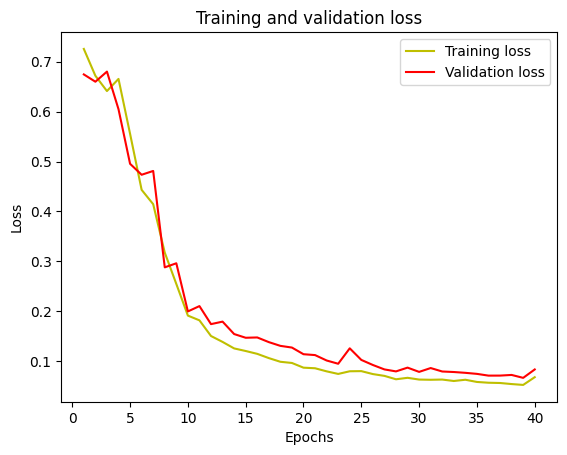

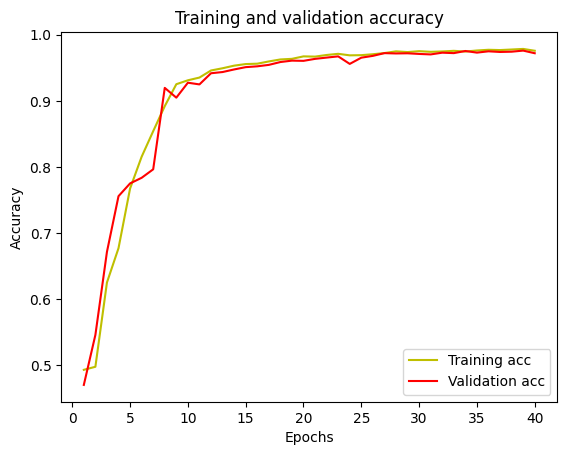

In [ ]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# # #Save the model for future use
# model.save('/content/drive/MyDrive/saved_models/mod_U.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# from keras.models import load_model
# model = load_model("/content/drive/MyDrive/saved_models/mod.hdf5", compile=False)

In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

1/1 [==============================] - 5s 5s/step


In [ ]:

from tensorflow.keras.metrics import MeanIoU

In [ ]:

n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())


Mean IoU = 0.9454847


In [ ]:
# import tensorflow as tf
# from keras import backend as K

# def dice_coefficient(y_test, y_pred):
#     smooth = 1e-5  # smoothing factor to avoid division by zero
#     intersection = K.sum(y_test * y_pred, axis=[1,2,3])
#     union = K.sum(y_test, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
#     dice = (2. * intersection + smooth) / (union + smooth)
#     return dice

# # Assuming y_pred_thresholded and y_test are your predicted and true labels, respectively
# dice_metric = dice_coefficient(y_test, y_pred_thresholded)

# # Get the result and print the Dice Coefficient
# print("Dice Coefficient =", K.mean(dice_metric).numpy())

In [ ]:

# threshold = 0.5
# test_img_number = random.randint(0, len(X_test)-1)
# test_img = X_test[test_img_number]
# ground_truth=y_test[test_img_number]
# test_img_input=np.expand_dims(test_img, 0)
# print(test_img_input.shape)
# prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
# print(prediction.shape)

# plt.figure(figsize=(16, 8))
# plt.subplot(231)
# plt.title('Testing Image')
# plt.imshow(test_img[:,:,0], cmap='gray')
# plt.subplot(232)
# plt.title('Testing Label')
# plt.imshow(ground_truth[:,:,0], cmap='gray')
# plt.subplot(233)
# plt.title('Prediction on test image')
# plt.imshow(prediction, cmap='gray')

# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Select a random test image and its ground truth
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth = y_test[test_img_number]

# Prepare the image for prediction
test_img_input = np.expand_dims(test_img, 0)

# Predict the mask
prediction = (model.predict(test_img_input)[0,:,:,0] > threshold).astype(np.uint8)

# Segment the original image using the predicted mask
segmented_image = test_img[:,:,0] * prediction  # Element-wise multiplication

# Display the results
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.subplot(234)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')

plt.show()


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from keras.models import load_model

# Load the trained UNet model
model = load_model('/content/drive/MyDrive/saved_models/mod.hdf5',compile='False')

# Define the function to segment an image
def segment_image(original_image):
    # Preprocess the original image (if needed)

    # Predict the mask
    predicted_mask = model.predict(np.expand_dims(original_image, axis=0))[0,:,:,0]

    # Threshold the predicted mask
    threshold = 0.5  # Adjust as needed
    binary_mask = (predicted_mask > threshold).astype(np.uint8)

    # Apply the binary mask to the original image to segment it
    segmented_image = cv2.bitwise_and(original_image, original_image, mask=binary_mask)

    return segmented_image

# Folder containing original images
input_folder = '/content/drive/MyDrive/Dataset/seg-normal'

# Folder to save segmented images
output_folder = '/content/drive/MyDrive/unet-images/temp_N'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through all images in the input folder
for filename in tqdm(os.listdir(input_folder)):
    # Load the original image
    original_image = cv2.imread(os.path.join(input_folder, filename), cv2.IMREAD_GRAYSCALE)

    # Segment the image
    segmented_image = segment_image(original_image)

    # Save the segmented image with the same filename
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, segmented_image)

print("Segmentation completed.")


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from keras.models import load_model

# Load the trained UNet model
model = load_model('/content/drive/MyDrive/saved_models/mod.hdf5', compile=False)

# Define the function to segment an image
def segment_image(original_image):
    # Preprocess the original image (if needed)

    # Predict the mask
    predicted_mask = model.predict(np.expand_dims(original_image, axis=0))[0,:,:,0]

    # Threshold the predicted mask
    threshold = 0.5  # Adjust as needed
    binary_mask = (predicted_mask > threshold).astype(np.uint8)

    return binary_mask

# Folder containing original images
input_folder = '/content/drive/MyDrive/Dataset/a'

# Folder to save binary mask images
output_folder = '/content/drive/MyDrive/unet-images/temp_d'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through all images in the input folder
for filename in tqdm(os.listdir(input_folder)):
    # Load the original image
    original_image = cv2.imread(os.path.join(input_folder, filename), cv2.IMREAD_GRAYSCALE)

    # Segment the image
    binary_mask = segment_image(original_image)

    # Convert the binary mask to a grayscale image
    binary_mask_image = (binary_mask * 255).astype(np.uint8)

    # Save the binary mask image with the same filename
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, binary_mask_image)

print("Binary mask images saved.")


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 349ms/step


100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Binary mask images saved.
